In [48]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [49]:
# cols = [
#     'Time (s)',
#     'Temp Converted 3-constants (C)',
#     'Epoch Time',
# ]
cols = [
    'Time (s)',
    'Temp Converted 3-constants (C)',
]
# df = pd.read_csv("thermistor data/reference thermistor/906249197524200_temperature.csv", usecols=cols)
df = pd.read_csv("thermistor data/last dataset before alex left.csv", usecols=cols)
filt = ~df['Time (s)'].isnull()
df = df.loc[filt]

In [50]:
df

,Time (s),Temp Converted 3-constants (C)
0,0.068054,21.707109
1,0.135860,21.707127
2,0.202835,21.707133
3,0.290871,21.707129
4,0.358088,21.707127
...,...,...
1587251,159999.733129,21.334348
1587252,159999.800679,21.334363
1587253,159999.867691,21.334368
1587254,159999.934683,21.334371


Text(0, 0.5, 'Temperature (C)')

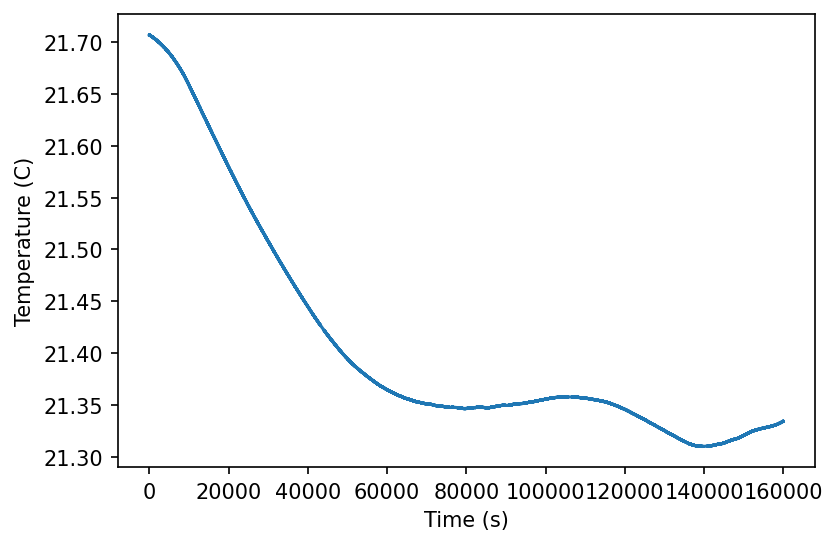

In [51]:
# df.plot('Time (s)', 'Temp Converted 3-constants (C)', ylabel='Temperature (C)', legend = True, dpi = 150)
fig, ax = plt.subplots(dpi = 150)
ax.plot(df['Time (s)'], df['Temp Converted 3-constants (C)'])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Temperature (C)')

In [52]:
rolling_window = 800
mean = df.rolling(rolling_window, center = True).mean()
minm = df.rolling(rolling_window, center = True).min()
maxm = df.rolling(rolling_window, center = True).max()
filt = ~mean['Time (s)'].isnull()
mean = mean.loc[filt]
filt = ~minm['Time (s)'].isnull()
minm = minm.loc[filt]
filt = ~maxm['Time (s)'].isnull()
maxm = maxm.loc[filt]

std = df.loc[:, 'Temp Converted 3-constants (C)'].rolling(rolling_window).std()
filt = ~std.isnull()
std = std.loc[filt]

In [53]:
# std
display(maxm)
display(minm)
display(maxm - minm)
# display(df)

,Time (s),Temp Converted 3-constants (C)
400,57.865020,21.707198
401,57.937896,21.707198
402,58.010905,21.707198
403,58.080786,21.707198
404,58.148132,21.707198
...,...,...
1586852,159999.733129,21.334351
1586853,159999.800679,21.334363
1586854,159999.867691,21.334368
1586855,159999.934683,21.334371


,Time (s),Temp Converted 3-constants (C)
400,0.068054,21.706913
401,0.135860,21.706913
402,0.202835,21.706913
403,0.290871,21.706913
404,0.358088,21.706912
...,...,...
1586852,159891.895870,21.334084
1586853,159891.963792,21.334084
1586854,159892.031592,21.334084
1586855,159892.119809,21.334084


,Time (s),Temp Converted 3-constants (C)
400,57.796965,0.000285
401,57.802035,0.000285
402,57.808070,0.000285
403,57.789915,0.000285
404,57.790044,0.000286
...,...,...
1586852,107.837259,0.000267
1586853,107.836886,0.000279
1586854,107.836098,0.000284
1586855,107.814873,0.000286


Text(0, 0.5, 'Rolling Window Index')

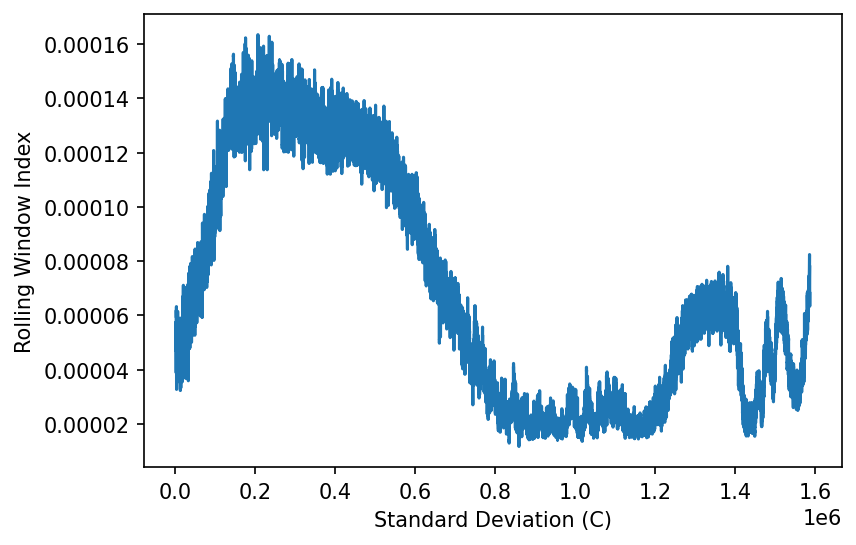

In [54]:
# std[5000:].plot()
# std.plot(ylabel = 'Standard Deviation (C)', xlabel = 'Rolling Window Index')
# filt = (std <= 0.0001)
# std.loc[filt].plot()
fig, ax = plt.subplots(dpi = 150)
ax.plot(std)
ax.set_xlabel('Standard Deviation (C)')
ax.set_ylabel('Rolling Window Index')

In [55]:
cols = [
    'Time (s)',
    'Temp Converted 3-constants (C)',
    'Epoch Time',
]
# df = pd.read_csv("thermistor data/reference thermistor/906249197524200_temperature.csv", usecols=cols)
# filt = ~df['Time (s)'].isnull()
# df = df.loc[filt]

path = "./thermistor data/reference thermistor/"
files = os.listdir(path)
for file in files:
    # print(path + file)
    df = pd.read_csv(path + file)